In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 讀取txt
save_list = []
with open("normal/data_20201227_101923.txt", "r") as filestream: 
    for line in filestream: 
        save_list.append(line)

# 打印出表情
print("表情為：",save_list[1])

# 列表中以逗點分割
arr = save_list[0][1:-2].split(',')

表情為： 開心


原使陣列大小 (2304,)
更改後的陣列大小 (48, 48)


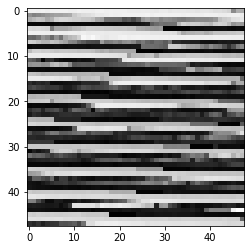

In [3]:
# 轉為陣列
img = np.array(arr)
print("原使陣列大小", img.shape)

# 更改大小並轉為float
reimg = img.reshape(48,48).astype(np.float32)
print("更改後的陣列大小", reimg.shape)

# 打印影像
plt.imshow(reimg, cmap='gray')
plt.show()

In [4]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

cropped_img = np.expand_dims(np.expand_dims(reimg, -1), 0)

print("更改為輸入的維度：",cropped_img.shape)

更改為輸入的維度： (1, 48, 48, 1)


In [5]:
prediction = model.predict(cropped_img)[0]

In [6]:
print("各機率值為:\n",prediction)

各機率值為:
 [1.2742035e-03 2.1847053e-07 7.9021333e-03 6.8850744e-01 1.6483208e-03
 1.4902281e-02 2.8576541e-01]


In [7]:
pred_array = prediction.tolist()

predictions = {
        "angry": float(prediction[0]),
        "disgusted": float(prediction[1]),
        "fearful": float(prediction[2]),
        "happy": float(prediction[3]),
        "sad": float(prediction[4]),
        "surprised": float(prediction[5]),
        "neutral": float(prediction[6])
    }

# 提取最大機率與預測名稱
probability = predictions[max(predictions, key=predictions.get)]
print("最大機率為:",probability)
prediction_name = max(predictions, key=predictions.get)
print("預測為:",prediction_name)

最大機率為: 0.6885074377059937
預測為: happy
